#### This notebook looks into the estimated variances for the connectivity weights

In [39]:
import init_paths
import os
import numpy as np
import cortico_cereb_connectivity.globals as gl
import glob
import matplotlib.pyplot as plt
from cortico_cereb_connectivity.scripts.script_train_eval_models import *
import matplotlib.pyplot as plt
from scipy import stats

Reading sub-02 weight variance...
max: 4.791855379670733e-05
Reading sub-03 weight variance...
max: 3.9562135730455966e-05
Reading sub-04 weight variance...
max: 1.7628115822063977e-05
Reading sub-06 weight variance...
max: 7.79568638757937e-06
Reading sub-08 weight variance...
max: 1.7626198712301815e-05
Reading sub-09 weight variance...
max: 1.8220615232271607e-05
Reading sub-10 weight variance...
max: 7.037608661456121e-06
Reading sub-12 weight variance...
max: 1.9973491966630984e-05
Reading sub-14 weight variance...
max: 9.046973239730988e-06
Reading sub-15 weight variance...
max: 1.5274504132172937e-05
Reading sub-17 weight variance...
max: 8.462204557965785e-05
Reading sub-18 weight variance...
max: 4.800355016151315e-06
Reading sub-19 weight variance...
max: 5.9217382473017495e-06
Reading sub-20 weight variance...
max: 1.0966197963828059e-05
Reading sub-21 weight variance...
max: 6.052874294510909e-06
Reading sub-22 weight variance...
max: 2.6137735194381777e-05
Reading sub-24 w

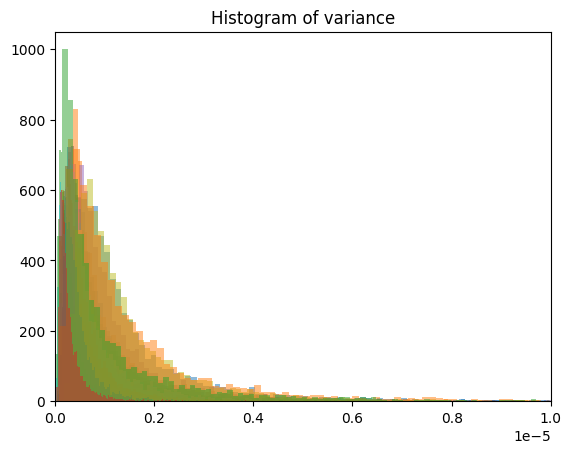

In [42]:
var_folder = os.path.join(os.getcwd(), '../data/variance')

dataset = fdata.get_dataset_class(gl.base_dir,
                                    dataset="MDTB")
subject_list = dataset.get_participants().participant_id

# read subject weight variance matrix from file
sigma2_mat = []
sigma2_subt = []
sigma2_reli = []
variance_list = []
params_list = []
for s, sub in enumerate(subject_list):
    print(f'Reading {str(sub)} weight variance...')
    file_path = os.path.join(var_folder, f'weight_variance_{str(sub)}.npy')
    variance = np.load(file_path)
    variance_list.append(variance)

    # print(f'Reading {str(sub)} sigma2_eps...')
    # file_path = os.path.join(var_folder, f'sigma2_eps_{str(sub)}.npy')
    # sigma2_mat.append(np.load(file_path))
    
    plt.hist(variance, bins='auto', alpha=0.5)
    shape, loc, scale = stats.gamma.fit(variance[~np.isnan(variance)], floc=0)
    params_list.append((shape, loc, scale))
    print(f'max: {np.nanmax(variance)}')

# # show
plt.title('Histogram of variance')
plt.xlim((0,0.00001))
plt.show()

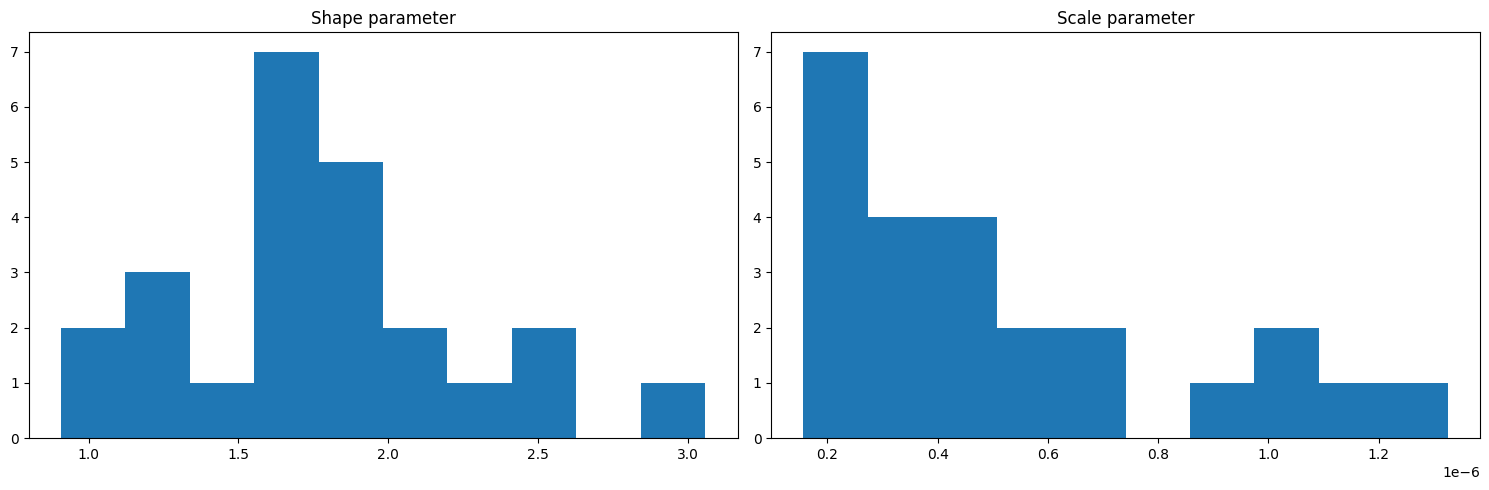

(1.1473032982361666, 1.2951274520344758, 0.9679436505658024, 1.8452195681630064, 1.7822897660345283, 1.607088495022598, 3.057081693706697, 1.6375526562271294, 2.196827625986511, 1.6968870328825916, 1.5361470793690883, 1.8737230591204888, 2.5429175638943304, 1.7508963622765228, 1.8814280106435932, 1.6895578585821505, 1.642025348856807, 2.2621450611351195, 2.0946819405313937, 1.6154985206435462, 2.593505731931396, 1.3085170629883034, 0.9076669866982234, 1.7745448565227115)
(1.04435014645967e-06, 9.138764653293884e-07, 4.666988535572443e-07, 2.779239529744621e-07, 7.286487598069237e-07, 5.230247200262774e-07, 2.309618954152391e-07, 5.803516088567669e-07, 3.5047770787073345e-07, 5.041656101959526e-07, 1.044049177883369e-06, 1.9907496858836985e-07, 1.5629181310067126e-07, 3.588449205053651e-07, 3.0256016588725965e-07, 4.4190299884387894e-07, 5.058722483036976e-07, 1.7146331892768562e-07, 7.167888527438791e-07, 1.9480913538541454e-07, 1.916676264294237e-07, 1.17357130551289e-06, 1.3255746273

In [43]:
shapes, _, scales = zip(*params_list)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(shapes)
axs[0].set_title('Shape parameter')
axs[1].hist(scales)
axs[1].set_title('Scale parameter')

plt.tight_layout()
plt.show()

print(shapes)
print(scales)

/tmp/ipykernel_52682/1236273637.py:1: RuntimeWarning: All-NaN axis encountered
  plt.hist(np.nanmax(variance_list, axis=0) / np.nanmin(variance_list, axis=0), bins='auto')


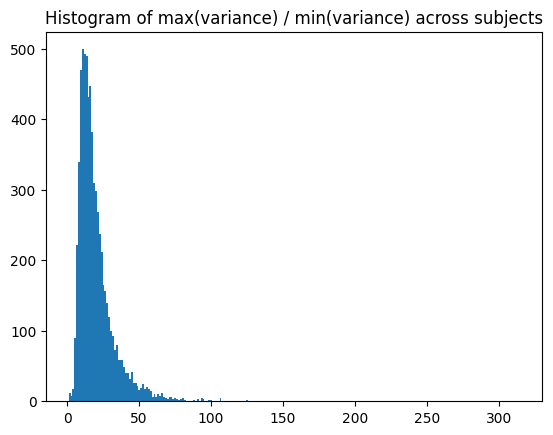

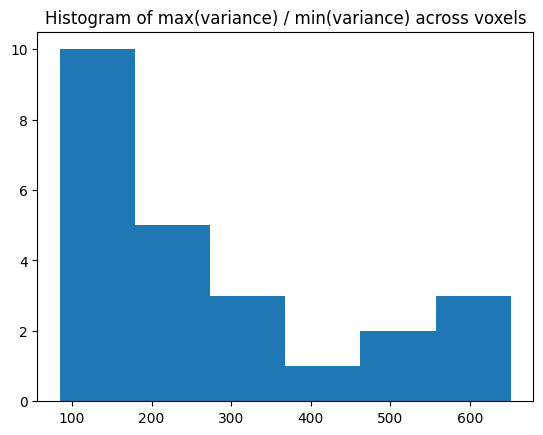

mean variance: [1.19818637e-06 1.18358650e-06 4.51738192e-07 5.12830716e-07
 1.29866323e-06 8.40547010e-07 7.06069382e-07 9.50356319e-07
 7.69939111e-07 8.55512086e-07 1.60381310e-06 3.73011359e-07
 3.97437197e-07 6.28300266e-07 5.69245171e-07 7.46620684e-07
 8.30655055e-07 3.87874900e-07 1.50144467e-06 3.14713870e-07
 4.97091088e-07 1.53563808e-06 1.20318033e-06 3.18570816e-07]
C_i: [0.02225239 0.02252688 0.05902205 0.05199087 0.02053074 0.03172043
 0.03776189 0.02805528 0.03462938 0.03116556 0.01662445 0.07147909
 0.0670861  0.04243594 0.04683836 0.03571092 0.03209818 0.06873998
 0.01775791 0.08471985 0.05363708 0.0173625  0.02216003 0.08369415]


In [44]:
plt.hist(np.nanmax(variance_list, axis=0) / np.nanmin(variance_list, axis=0), bins='auto')
plt.title('Histogram of max(variance) / min(variance) across subjects')
plt.show()

plt.hist(np.nanmax(variance_list, axis=1) / np.nanmin(variance_list, axis=1), bins='auto')
plt.title('Histogram of max(variance) / min(variance) across voxels')
plt.show()

mean_variance = np.nanmean(variance_list, axis=1)
print(f'mean variance: {mean_variance}')
c_i = np.reciprocal(mean_variance) / np.sum(np.reciprocal(mean_variance))
print(f'C_i: {c_i}')

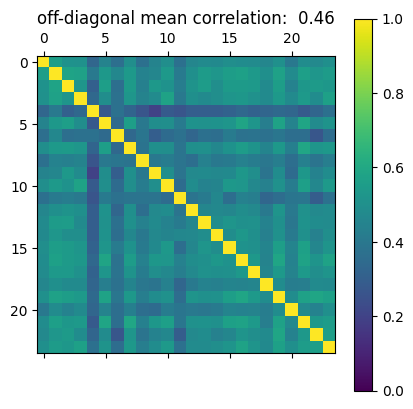

In [45]:
def rank_with_nan(arr):
    valid_indices = ~np.isnan(arr)
    ranks = np.empty_like(arr)
    ranks[valid_indices] = np.argsort(np.argsort(arr[valid_indices]))
    ranks[~valid_indices] = np.nan
    return ranks

all_sub_ranks = np.array([rank_with_nan(variance_list[s]) for s in range(len(subject_list))])

correlation_matrix, _ = stats.spearmanr(all_sub_ranks, axis=1, nan_policy='omit')

mat = plt.matshow(correlation_matrix)
plt.colorbar()
mat.set_clim(0, 1)
plt.title(f'off-diagonal mean correlation: {np.mean(correlation_matrix[~np.eye(24, dtype=bool)]): .2f}')
plt.show()